# House Sales Analysisin King County, USA

                                                                                             Anyi Fu

In [260]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install sklearn
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [3]:
# Importing dataset, check type for each column and preview first 5 rows
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
print(df.dtypes)
df.head()

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Data wrangling - drop the unecessary columns
df=pd.read_csv(file_name)
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Check missing values and replace them with the mean of each column
for i in df:
    if df[i].isnull().sum() != 0:
        mean = df[i].mean()
        df[i].replace(np.nan,mean, inplace=True)

In [7]:
# Explore data

# Use value_counts to count the number of houses in each category
# here we count the number of houses with unique floor values and convert to frame
df['floors'].value_counts().sort_index(ascending = True).to_frame()

,floors
1.0,10680
1.5,1910
2.0,8241
2.5,161
3.0,613
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

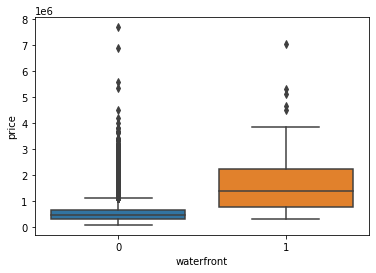

In [8]:
# Use boxplot to check outliers
# e.g. determine whether houses with a waterfront view or without a waterfront view have more price outliers
sns.boxplot(x="waterfront", y="price", data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price_k'>

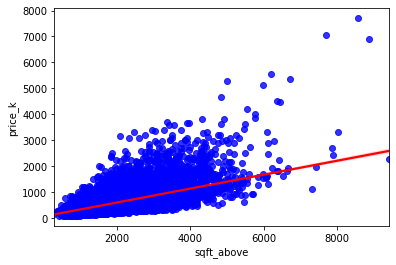

In [267]:
# Use regplot to see if a feature is negatively or positively correlated with price
# Here we use sqft_above as an example
df["price_k"]=df["price"]/1000
sns.regplot(x="sqft_above", y="price_k", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})


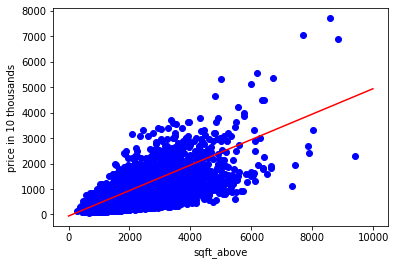

In [268]:
# Still using aqft_above as the example, and here we are trying to use matplotlib library to plot
# and trying to estimate the linear model

x = np.arange(0.0, 10000.0, 10)
y = 0.5 * (x) - 60
# You can adjust the slope and intercept to verify the changes in the graph
ydata = df["price_k"]
xdata = df["sqft_above"]
#plt.figure(figsize=(8,6))
plt.plot(xdata, ydata,  'bo') # 'bo' stands for blue circle mark
plt.plot(x,y, 'r') 
plt.ylabel('price in 10 thousands')
plt.xlabel('sqft_above')
plt.show()

In [239]:
# Find the feature other than price that is most correlated with price.
df.corr()['price'].sort_values()

# Here we can see that the correlation between sqft_living and price is roughly 0.702
# which means among the given features, square feet of living is most correlated with price

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price_k          1.000000
price            1.000000
price_10k        1.000000
Name: price, dtype: float64

In [241]:
# Model developement
# Fit a linear regression model and calculate R^2
# Here we use the feature 'long' as an example

longitude = df[['long']]
price = df['price']
lr = LinearRegression()
lr.fit(longitude, price)
lr.score(longitude, price)

# Since the R^2 of 'long' is only 0.0004677, it is not suitable to use linear regression for this feature

0.00046769430149007363

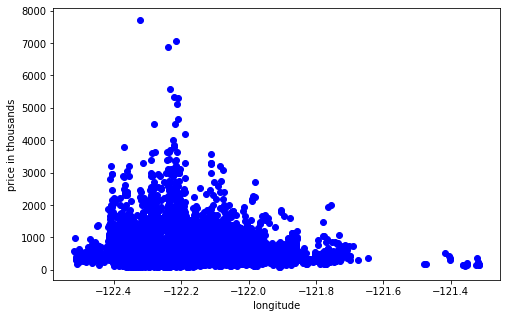

In [269]:
#Let's check the plot of 'long' (here we use matplotlib instead of seaborn)
x = np.arange(-130.0, 130.0, 0.1)
plt.figure(figsize = (8,5))
x_data, y_data = (df["long"].values, df["price_k"].values)
plt.plot(x_data, y_data, 'bo') 
plt.xlabel("longitude")
plt.ylabel("price in thousands")
plt.show()

In [273]:
cdf = df[['long', 'price_k', 'price']]
cdf.head(9)

,long,price_k,price
0,-122.257,221.90,221900.0
1,-122.319,538.00,538000.0
2,-122.233,180.00,180000.0
3,-122.393,604.00,604000.0
4,-122.045,510.00,510000.0
5,-122.005,1225.00,1225000.0
6,-122.327,257.50,257500.0
7,-122.315,291.85,291850.0
8,-122.337,229.50,229500.0


In [398]:
msk = np.random.randn(len(df)) < 0.8
# np.random.randn(len(df)) randomly generate len(df) amoubnt of numbers in [0, 1] from uniform distribution
train = cdf[msk]
test = cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['long']])
train_y = np.asanyarray(train[['price_k']])

test_x = np.asanyarray(test[['long']])
test_y = np.asanyarray(test[['price_k']])


poly = PolynomialFeatures(degree = 2) # try to set degree as 2
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.00000000e+00, -1.22319000e+02,  1.49619378e+04],
       [ 1.00000000e+00, -1.22233000e+02,  1.49409063e+04],
       [ 1.00000000e+00, -1.22045000e+02,  1.48949820e+04],
       ...,
       [ 1.00000000e+00, -1.22299000e+02,  1.49570454e+04],
       [ 1.00000000e+00, -1.22069000e+02,  1.49008408e+04],
       [ 1.00000000e+00, -1.22299000e+02,  1.49570454e+04]])

In [399]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[      0.         -177111.31948393    -725.22713755]]
Intercept:  [-10812745.12904534]


Text(0, 0.5, 'price in thousands')

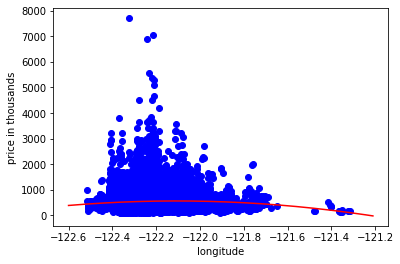

In [405]:
plt.scatter(train.long, train.price_k,  color='blue')
XX = np.arange(-122.6, -121.2, 0.01)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX,yy, '-r' )
plt.xlabel("longitude")
plt.ylabel("price in thousands")

# So far we can see actually longitude does not necessarily have direct relation with price
# Here we just use it as an example for non-linear regression model